<a href="https://colab.research.google.com/github/rohitgupta29/Hackathons/blob/main/e_commerce_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

Files

In [ ]:
train = "https://raw.githubusercontent.com/rohitgupta29/Hackathons/main/e-commerce_retail/Data/Train.csv"
test = "https://raw.githubusercontent.com/rohitgupta29/Hackathons/main/e-commerce_retail/Data/Test.csv"

In [ ]:
df = pd.read_csv(train, dtype = {'CustomerID' : str, 'StockCode': str,'Description': str,
                                         'Country' : str, 'InvoiceNo' : str}, index_col = False)
df.describe()

,Quantity,UnitPrice
count,284780.000000,284780.000000
mean,12.028468,3.451216
std,295.111588,78.399541
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
df.Description.nunique()

3819

In [ ]:
df.corr()

,Quantity,UnitPrice
Quantity,1.000000,-0.000924
UnitPrice,-0.000924,1.000000


In [ ]:
df['Quantity'] = df.Quantity.abs()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.sort_values(by=['InvoiceDate'], inplace=True, ascending=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
33757,0,755,1444,6,2010-12-01 08:26:00,4.25,17850.0,35
59748,0,2802,2776,6,2010-12-01 08:26:00,3.39,17850.0,35
124355,0,2855,861,8,2010-12-01 08:26:00,2.75,17850.0,35
64500,0,3249,3716,6,2010-12-01 08:26:00,2.55,17850.0,35
281503,0,2803,1813,6,2010-12-01 08:26:00,3.39,17850.0,35


In [ ]:
df = df.set_index('InvoiceDate')


In [ ]:
#Lets drop Customer ID as it wont provide much.
df = df.drop(columns = ['CustomerID'])

In [ ]:
df.describe()

,Quantity,UnitPrice
count,284780.000000,284780.000000
mean,13.645885,3.451216
std,295.041223,78.399541
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
df['Description'].value_counts().head()

3716    1472
2780    1292
1771    1172
217      998
1953     996
Name: Description, dtype: int64

In [ ]:
df.iloc[:1200]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
InvoiceDate,,,,,,,
2010-12-01 08:26:00,0,755,1444,6,4.25,35,25.50
2010-12-01 08:26:00,0,2802,2776,6,3.39,35,20.34
2010-12-01 08:26:00,0,2855,861,8,2.75,35,22.00
2010-12-01 08:26:00,0,3249,3716,6,2.55,35,15.30
2010-12-01 08:26:00,0,2803,1813,6,3.39,35,20.34
...,...,...,...,...,...,...,...
2010-12-01 15:35:00,95,806,1381,1,4.95,35,4.95
2010-12-01 15:35:00,95,816,2291,4,1.45,35,5.80
2010-12-01 15:37:00,97,2423,349,24,0.65,35,15.60


Here we can see our best selling products, items that appear in orders the most often. Also to make it visually more appealing let's create a bar chart for 15 top items.

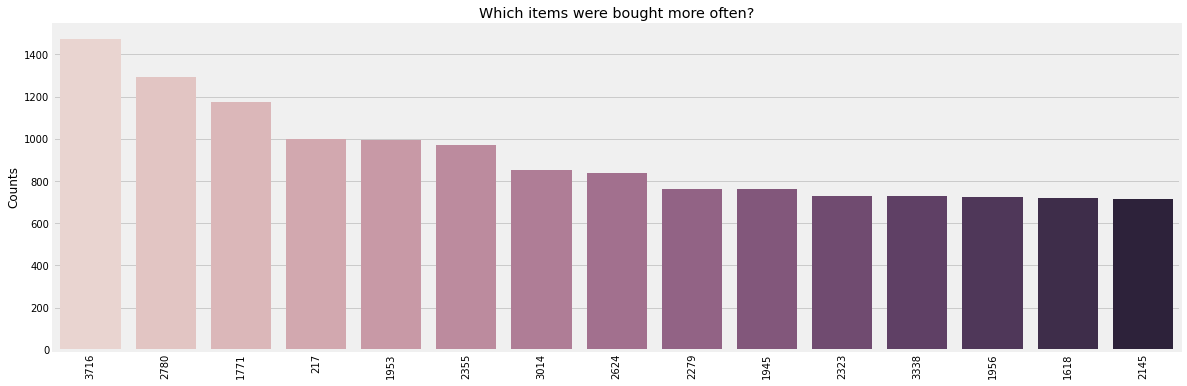

In [ ]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [ ]:
df['Description'].value_counts().tail()

2497    1
280     1
2629    1
316     1
192     1
Name: Description, dtype: int64

ALso checking out stoke codes, looks like they are deeply correlated with descriptions - which makes perfect sense.

In [ ]:
df['StockCode'].value_counts().head()

3249    1478
1292    1292
3235    1172
3069     998
170      997
Name: StockCode, dtype: int64

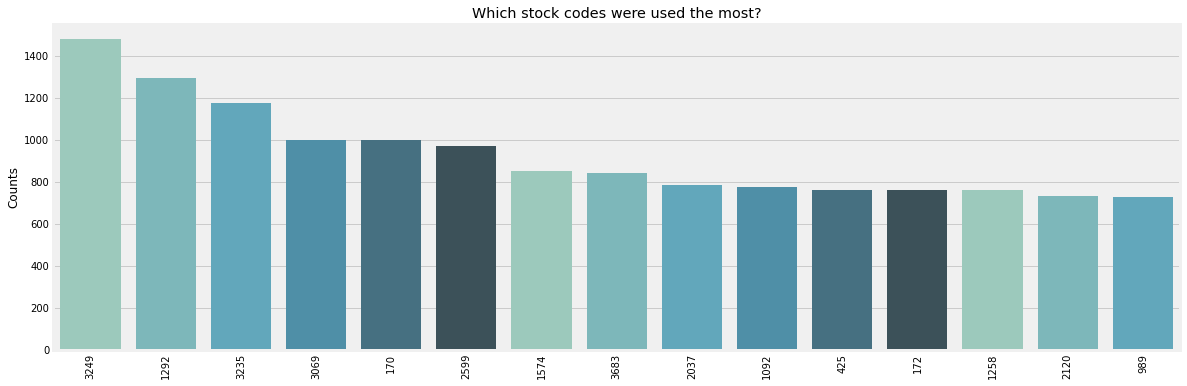

In [ ]:
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(stock_counts.index, stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

Checking out also InvoiceNo feature.

In [ ]:
df['InvoiceNo'].value_counts().tail()

21753    1
19646    1
21193    1
17777    1
20791    1
Name: InvoiceNo, dtype: int64

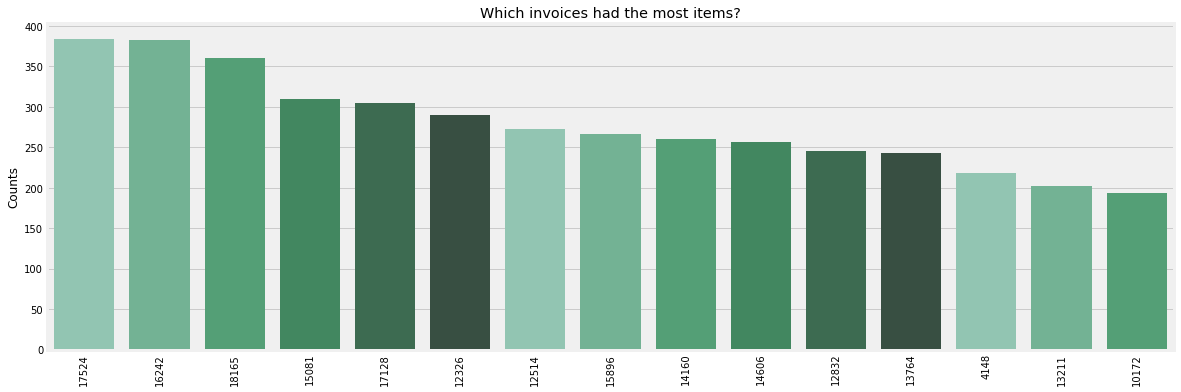

In [ ]:
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(inv_counts.index, inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

Here we can see that other "Negative quantities" appear to be damaged/lost/unknown items. Again, we will just ignore them for the sake of simplicity of analysis for this project.

In [ ]:
df.describe()

,Quantity,UnitPrice
count,284780.000000,284780.000000
mean,13.645885,3.451216
std,295.041223,78.399541
min,1.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
df[df['UnitPrice'] <= 0].describe()

,Quantity,UnitPrice
count,34.000000,34.0
mean,400.411765,0.0
std,2145.979781,0.0
min,1.000000,0.0
25%,1.000000,0.0
50%,4.000000,0.0
75%,24.000000,0.0
max,12540.000000,0.0


In [ ]:
df = df[df['UnitPrice'] > 0]
df.describe()

,Quantity,UnitPrice
count,284746.000000,284746.000000
mean,13.599703,3.451628
std,294.122660,78.404213
min,1.000000,0.001000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [ ]:
temp = df[df['UnitPrice'] < 0.06].describe()
temp

,Quantity,UnitPrice
count,48.000000,48.000000
mean,127.583333,0.036125
std,149.970470,0.011544
min,1.000000,0.001000
25%,100.000000,0.040000
50%,100.000000,0.040000
75%,100.000000,0.040000
max,900.000000,0.040000


In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales
InvoiceDate,,,,,,,
2010-12-01 08:26:00,0,755,1444,6,4.25,35,25.50
2010-12-01 08:26:00,0,2802,2776,6,3.39,35,20.34
2010-12-01 08:26:00,0,2855,861,8,2.75,35,22.00
2010-12-01 08:26:00,0,3249,3716,6,2.55,35,15.30
2010-12-01 08:26:00,0,2803,1813,6,3.39,35,20.34


Visual EDA 

(array([0]), <a list of 1 Text major ticklabel objects>)

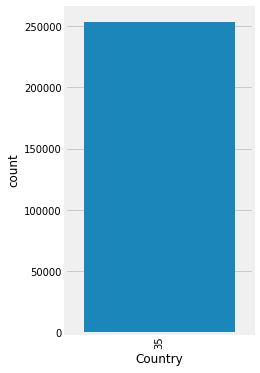

In [ ]:
plt.figure(figsize=(3,6))
sns.countplot(df[df['Country'] == '35']['Country'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text major ticklabel objects>)

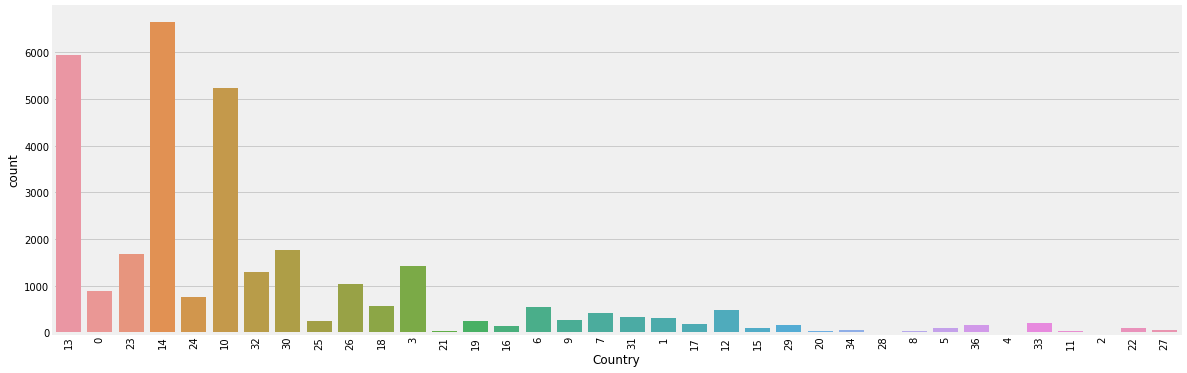

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(df[df['Country'] != '35']['Country'])
plt.xticks(rotation=90)

In [ ]:
base_count = df[df['Country'] == '35']['Country'].count()
all_count = df['Country'].count()
base_perc = base_count/all_count
print(str('{0:.2f}%').format(base_perc*100))

88.93%


From above plots and calculations we can see that vast majority of sales were made in "35" and just 11% went abroad. We can say our dataset is skewed to the "35" side :D.

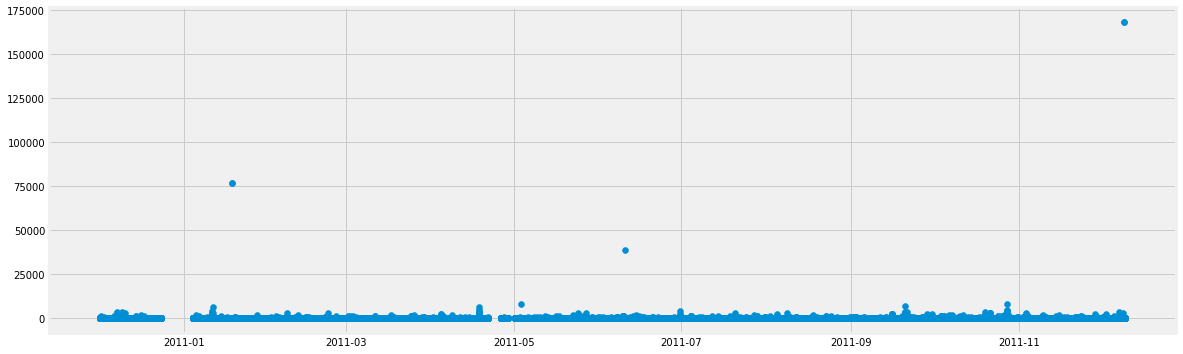

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Sales'])

Let's remove obvious outliers

(array([734138., 734197., 734258., 734319., 734381., 734442.]),
 <a list of 6 Text major ticklabel objects>)

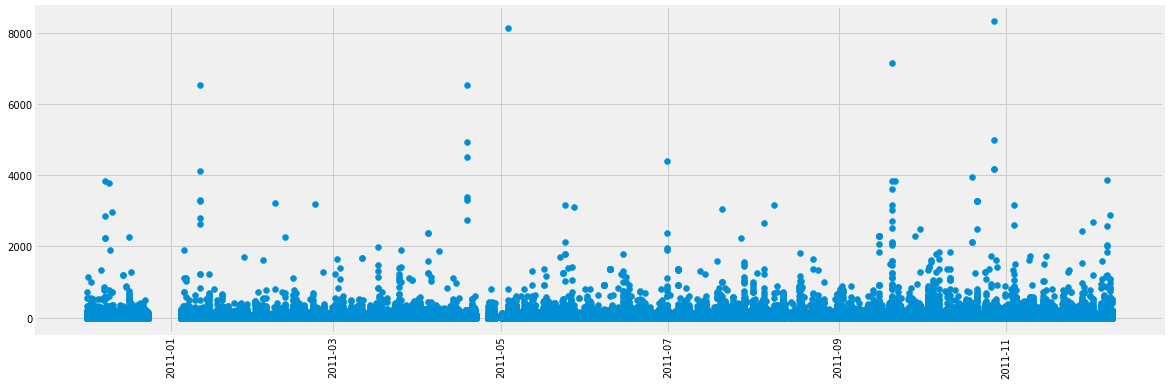

In [ ]:
df = df[df['Sales'] < 25000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Sales'])
plt.xticks(rotation=90)

After removing obvious outliers we still see some values that are out of normal distribution. To understand better the distribution of our data let's check out different percentiles of our numeric features.

In [ ]:
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,Quantity,UnitPrice,Sales
0.050,1.0,0.42,1.25
0.950,36.0,8.50,67.50
0.980,96.0,12.75,136.00
0.990,120.0,15.00,204.00
0.999,504.0,50.00,900.00


We can see that if we remove top 2% of our data points we will get rid of absolute outliers and will have more balaced dataset.

(array([734138., 734197., 734258., 734319., 734381., 734442.]),
 <a list of 6 Text major ticklabel objects>)

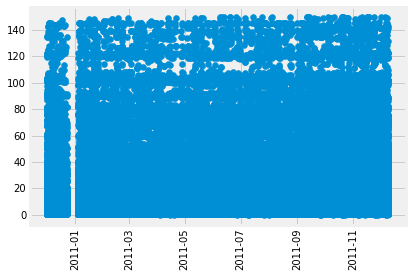

In [ ]:
df_quantile = df[df['Sales'] < 150]
plt.scatter(x=df_quantile.index, y=df_quantile['Sales'])
plt.xticks(rotation=90)

In [ ]:
df_quantile.describe()

,Quantity,UnitPrice,Sales
count,279723.000000,279723.000000,279723.000000
mean,9.851954,2.921753,15.890253
std,19.048995,3.653550,18.862580
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.350000
50%,5.000000,1.950000,10.950000
75%,12.000000,3.750000,18.000000
max,2400.000000,145.000000,149.850000


ooks like our data is almost ready for modelling. We performed a clean up, we removed outliers that were disturbing the balance of our dataset, we removed invalid records - now our data looks much better! and it doesn't lose it's value.

Visually checking distribution of numeric features

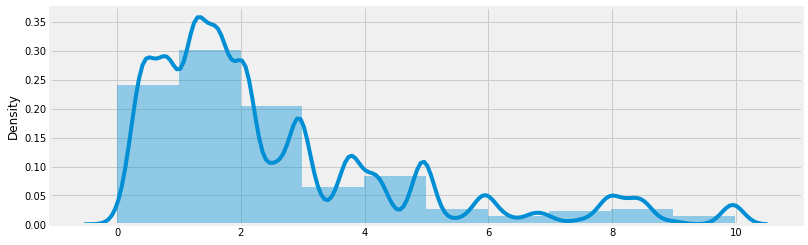

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 10]['UnitPrice'].values, kde=True, bins=10)

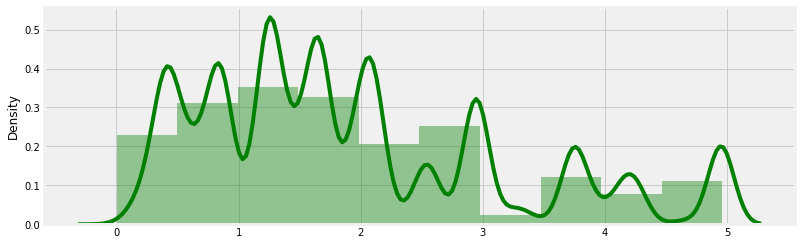

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 5]['UnitPrice'].values, kde=True, bins=10, color='green')

From these histograms we can infer that vast majority of items sold in this store has a low price range - 0 to 3 units.

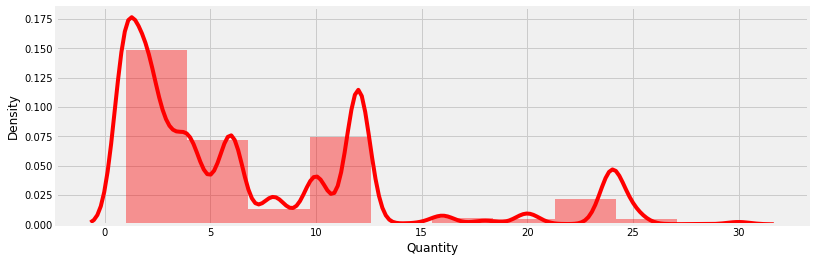

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 30]['Quantity'], kde=True, bins=10, color='red')

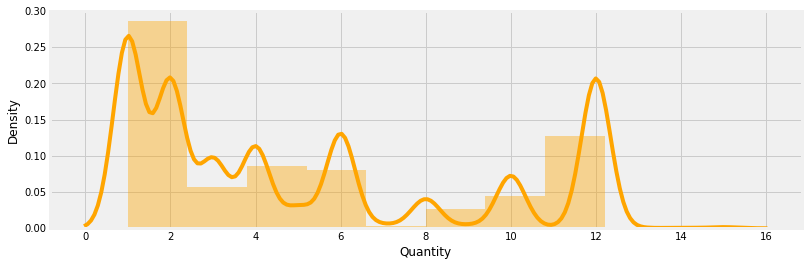

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 15]['Quantity'], kde=True, bins=10, color='orange')

From these histograms we that people bought normally 1-5 items or 10-12 - maybe there were some kind of offers for sets?

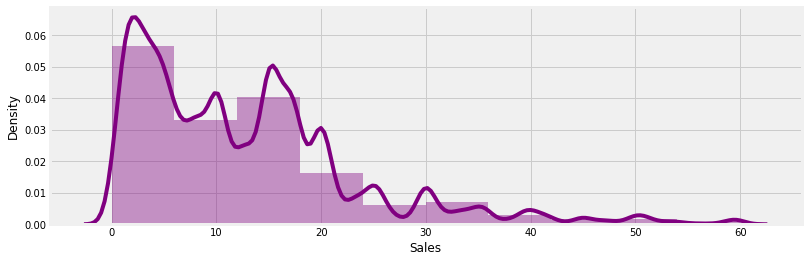

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Sales'] < 60]['Sales'], kde=True, bins=10, color='purple')

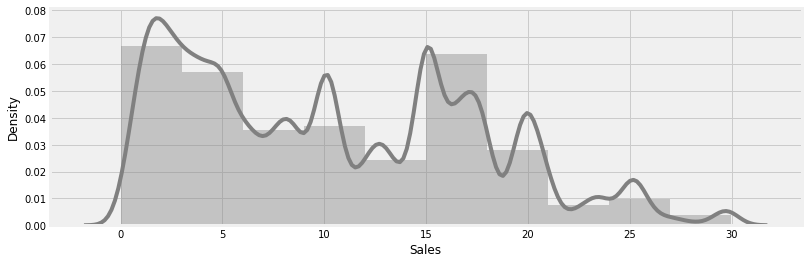

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Sales'] < 30]['Sales'], kde=True, bins=10, color='grey')


From these histograms we can understand that majority of sales per order were in range 1-15 pounds each.

Analysing sales over time

In [ ]:
df_ts = df[['Sales']]
df_ts.head()

,Sales
InvoiceDate,
2010-12-01 08:26:00,25.50
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34


As we can see every invoice has it's own timestamp (definitely based on time the order was made). We can resample time data by, for example weeks, and try see if there is any patterns in our sales.

<Figure size 1296x432 with 0 Axes>

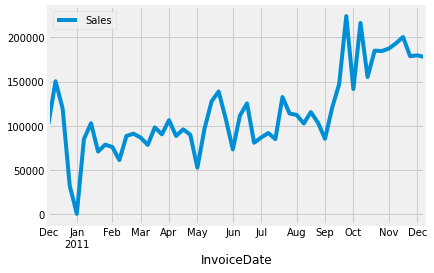

In [ ]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

That week with 0 sales in January looks suspicious, let's check it closer

In [ ]:
df_resample['12-2010':'01-2011']

,Sales
InvoiceDate,
2010-12-05,101857.11
2010-12-12,150269.56
2010-12-19,119460.43
2010-12-26,31857.53
2011-01-02,0.00
2011-01-09,84631.60
2011-01-16,102713.96
2011-01-23,70622.46
2011-01-30,78414.77


Now it makes sense - possibly, during the New Year holidays period the store was closed and didn't process orders, that's why they didn't make any sales.

Preparing data for modeling and feature creation

Now it comes the most fun part of the project - building a model. To do this we will need to create few more additional features to make our model more sophisticated.

In [ ]:
df_clean = df[df['UnitPrice'] < 15]
df_clean.describe()

,Quantity,UnitPrice,Sales
count,281849.000000,281849.000000,281849.000000
mean,12.617810,2.733173,21.196198
std,42.303379,2.554944,71.248773
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.560000
50%,6.000000,1.950000,11.500000
75%,12.000000,3.750000,19.500000
max,4300.000000,14.960000,7144.720000


In [ ]:
df_clean.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               '2010-12-01 08:34:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:49:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=281849, freq=None)

Quantity per invoice Feature

A feature that could influence the sales output could be "Quantity per invoice". Let's find the data for this feature.

In [ ]:
df_join = df_clean.groupby('InvoiceNo')[['Quantity']].sum()

In [ ]:
df_join = df_join.reset_index()
df_join.head(10)

,InvoiceNo,Quantity
0,0,34
1,1,6
2,10,74
3,100,3
4,1000,31
5,10000,96
6,10001,172
7,10002,60
8,10003,192
9,10004,1676


In [ ]:
df_clean['InvoiceDate'] = df_clean.index
df_clean = df_clean.merge(df_join, how='left', on='InvoiceNo')
df_clean = df_clean.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df_clean.tail(15)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv
281834,18533,1761,213,24,0.19,35,4.56,2011-12-09 12:31:00,206
281835,18533,1073,3550,12,1.95,35,23.40,2011-12-09 12:31:00,206
281836,18533,1332,1174,12,1.95,35,23.40,2011-12-09 12:31:00,206
281837,18534,964,1836,8,2.95,35,23.60,2011-12-09 12:49:00,42
281838,18534,429,2750,24,8.95,35,214.80,2011-12-09 12:49:00,42
281839,18534,146,1029,10,7.08,35,70.80,2011-12-09 12:49:00,42
281840,18535,1488,785,12,1.95,13,23.40,2011-12-09 12:50:00,61
281841,18535,2088,706,4,4.15,13,16.60,2011-12-09 12:50:00,61
281842,18535,1746,695,6,2.10,13,12.60,2011-12-09 12:50:00,61
281843,18535,1579,143,4,3.75,13,15.00,2011-12-09 12:50:00,61


In [ ]:
df_clean.describe()

,Quantity,UnitPrice,Sales,QuantityInv
count,281849.000000,281849.000000,281849.000000,281849.000000
mean,12.617810,2.733173,21.196198,302.734475
std,42.303379,2.554944,71.248773,622.927987
min,1.000000,0.001000,0.001000,1.000000
25%,2.000000,1.250000,4.560000,91.000000
50%,6.000000,1.950000,11.500000,166.000000
75%,12.000000,3.750000,19.500000,303.000000
max,4300.000000,14.960000,7144.720000,11568.000000


In [ ]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])


In [ ]:
df_clean.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Country                object
Sales                 float64
InvoiceDate    datetime64[ns]
QuantityInv             int64
dtype: object

Bucketizing Quantity and UnitPrice features

Based on the EDA done previously we can group these features into 6 buckets for Quantity and 5 for UnitePrice using pandas .cut() method.

In [ ]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df_clean['QuantityRange'] = pd.cut(df_clean['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df_clean['PriceRange'] = pd.cut(df_clean['UnitPrice'], bins=bins_p)
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,0,755,1444,6,4.25,35,25.50,2010-12-01 08:26:00,34,"(5, 8]","(4, 20]"
1,0,2802,2776,6,3.39,35,20.34,2010-12-01 08:26:00,34,"(5, 8]","(3, 4]"
2,0,2855,861,8,2.75,35,22.00,2010-12-01 08:26:00,34,"(5, 8]","(2, 3]"
3,0,3249,3716,6,2.55,35,15.30,2010-12-01 08:26:00,34,"(5, 8]","(2, 3]"
4,0,2803,1813,6,3.39,35,20.34,2010-12-01 08:26:00,34,"(5, 8]","(3, 4]"


Extracting and bucketizing dates

We have noticed that depends on a season gifts sell differently: pick of sales is in the Q4, then it drastically drops in Q1 of the next year and continues to grow till its new pick in Q4 again. From this observation we can create another feature that could improve our model.

In [ ]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month
0,0,755,1444,6,4.25,35,25.50,2010-12-01 08:26:00,34,"(5, 8]","(4, 20]",12
1,0,2802,2776,6,3.39,35,20.34,2010-12-01 08:26:00,34,"(5, 8]","(3, 4]",12
2,0,2855,861,8,2.75,35,22.00,2010-12-01 08:26:00,34,"(5, 8]","(2, 3]",12
3,0,3249,3716,6,2.55,35,15.30,2010-12-01 08:26:00,34,"(5, 8]","(2, 3]",12
4,0,2803,1813,6,3.39,35,20.34,2010-12-01 08:26:00,34,"(5, 8]","(3, 4]",12


In [ ]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df_clean.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Sales,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
281844,18535,1414,2584,12,1.65,13,19.80,2011-12-09 12:50:00,61,"(11, 14]","(1, 2]",12,"(9, 12]"
281845,18535,1486,3330,12,1.95,13,23.40,2011-12-09 12:50:00,61,"(11, 14]","(1, 2]",12,"(9, 12]"
281846,18535,1581,146,4,3.75,13,15.00,2011-12-09 12:50:00,61,"(2, 5]","(3, 4]",12,"(9, 12]"
281847,18535,1039,271,3,4.95,13,14.85,2011-12-09 12:50:00,61,"(2, 5]","(4, 20]",12,"(9, 12]"
281848,18535,2087,700,4,4.15,13,16.60,2011-12-09 12:50:00,61,"(2, 5]","(4, 20]",12,"(9, 12]"


In [ ]:
df_clean.drop(["PriceRange", "Sales"], axis = 1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,InvoiceDate,QuantityInv,QuantityRange,Month,DateRange
0,0,755,1444,6,4.25,35,2010-12-01 08:26:00,34,"(5, 8]",12,"(9, 12]"
1,0,2802,2776,6,3.39,35,2010-12-01 08:26:00,34,"(5, 8]",12,"(9, 12]"
2,0,2855,861,8,2.75,35,2010-12-01 08:26:00,34,"(5, 8]",12,"(9, 12]"
3,0,3249,3716,6,2.55,35,2010-12-01 08:26:00,34,"(5, 8]",12,"(9, 12]"
4,0,2803,1813,6,3.39,35,2010-12-01 08:26:00,34,"(5, 8]",12,"(9, 12]"
...,...,...,...,...,...,...,...,...,...,...,...
281844,18535,1414,2584,12,1.65,13,2011-12-09 12:50:00,61,"(11, 14]",12,"(9, 12]"
281845,18535,1486,3330,12,1.95,13,2011-12-09 12:50:00,61,"(11, 14]",12,"(9, 12]"
281846,18535,1581,146,4,3.75,13,2011-12-09 12:50:00,61,"(2, 5]",12,"(9, 12]"
281847,18535,1039,271,3,4.95,13,2011-12-09 12:50:00,61,"(2, 5]",12,"(9, 12]"


# **Building a model**

Splitting data into "35" and non-35

We have to analyze these 2 datasets separately to have more standardized data for a model, because there can be some patterns that work for other countries and do not for "35" or vise versa. Also a hypothesis to test - does the model built for "35" performs good on data for other countries?

In [ ]:
df_clean["35"] = np.where(df_clean.Country == "35", 1, 0)
df_clean["35"] = df_clean["35"].apply(str)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281849 entries, 0 to 281848
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      281849 non-null  object        
 1   StockCode      281849 non-null  object        
 2   Description    281849 non-null  object        
 3   Quantity       281849 non-null  int64         
 4   UnitPrice      281849 non-null  float64       
 5   Country        281849 non-null  object        
 6   Sales          281849 non-null  float64       
 7   InvoiceDate    281849 non-null  datetime64[ns]
 8   QuantityInv    281849 non-null  int64         
 9   QuantityRange  281516 non-null  category      
 10  PriceRange     281849 non-null  category      
 11  Month          281849 non-null  int64         
 12  DateRange      281849 non-null  category      
 13  35             281849 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(2), int64

In [ ]:
# df_35 = df_clean[df_clean['Country'] == '35']
# df_abroad = df_clean[df_clean['Country'] != '35']

In [ ]:
# df_35.shape, df_abroad.shape

Extracting features and creating dummy variables

In [ ]:
df_clean_model = df_clean[['UnitPrice', 'QuantityInv', 'QuantityRange', 'DateRange',"Country"]]
df_clean_model.head()

,UnitPrice,QuantityInv,QuantityRange,DateRange,Country
0,4.25,34,"(5, 8]","(9, 12]",35
1,3.39,34,"(5, 8]","(9, 12]",35
2,2.75,34,"(5, 8]","(9, 12]",35
3,2.55,34,"(5, 8]","(9, 12]",35
4,3.39,34,"(5, 8]","(9, 12]",35


In [ ]:
df_data = df_clean_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
# df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,UnitPrice,QuantityInv,Country,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,4.25,34,35,0,0,1,0,0,0,0,0,0,1
1,3.39,34,35,0,0,1,0,0,0,0,0,0,1
2,2.75,34,35,0,0,1,0,0,0,0,0,0,1
3,2.55,34,35,0,0,1,0,0,0,0,0,0,1
4,3.39,34,35,0,0,1,0,0,0,0,0,0,1


## **Scaling**

As the majority of our features are in 0-1 range it would make sense to scale "QuantityInv" feature too. In general, scaling features is normally a good idea.

In [ ]:
from sklearn.preprocessing import scale
df_data['QuantityInv'] = scale(df_data['QuantityInv'])

In [ ]:
df_data.head()

,UnitPrice,QuantityInv,Country,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,4.25,-0.431406,35,0,0,1,0,0,0,0,0,0,1
1,3.39,-0.431406,35,0,0,1,0,0,0,0,0,0,1
2,2.75,-0.431406,35,0,0,1,0,0,0,0,0,0,1
3,2.55,-0.431406,35,0,0,1,0,0,0,0,0,0,1
4,3.39,-0.431406,35,0,0,1,0,0,0,0,0,0,1


# Train-Test Split

Now we have to split our data into train-test data to be able to train our model and validate its capabilities.

In [ ]:
y = df_data['UnitPrice']
X = df_data.drop(columns=['UnitPrice'])
X.shape, y.shape

((281849, 12), (281849,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## **Testing and validating different models**

Here we use GridSearch and CrossValidation to test three types of regressors: Linear, DecisionTree and RandomForest. This can take a while...

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}
Best score is 0.1606268641907721
MAE for LinearRegression
1.6353237691659788
MSE for LinearRegression
5.467068074911137
R2 score for LinearRegression
0.16206053195717673
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.23765759838601266
MAE for DecisionTreeRegressor
1.501050039016451
MSE for DecisionTreeRegressor
4.875292912243831
R2 score for DecisionTreeRegressor
0.25276212158654265
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.24774562728949467
MAE for RandomForest
1.4951850738375247
MSE for RandomForest
4.824553527019926
R2 score for RandomForest
0.2605389652037734
 === End of rep

In [ ]:

test = pd.read_csv("https://raw.githubusercontent.com/rohitgupta29/Hackathons/main/e-commerce_retail/Data/test_range_35.csv", index_col = False)
X_test = test.drop("Unnamed: 0", axis =1 )
X_test.head()

,QuantityInv,Country,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,-0.487008,35,0,0,1,0,0,0,0,0,0,1
1,-0.487008,35,0,0,1,0,0,0,0,0,0,1
2,-0.475691,35,0,1,0,0,0,0,0,0,0,1
3,-0.475691,35,0,0,1,0,0,0,0,0,0,1
4,-0.373842,13,0,0,0,0,0,1,0,0,0,1


In [ ]:
y_train = df_data['UnitPrice']
X_train = df_data.drop(columns=['UnitPrice'])
X_train.shape

(281849, 12)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  # mae_dict[model] = mean_absolute_error(y_test, y_pred)
  # print("MAE for {}".format(model))
  # print(mean_absolute_error(y_test, y_pred))
  # mse_dict[model] = mean_squared_error(y_test, y_pred)
  # print("MSE for {}".format(model))
  # print(mean_squared_error(y_test, y_pred))
  # r2_dict[model] = r2_score(y_test, y_pred)
  # print("R2 score for {}".format(model))
  # print(r2_score(y_test, y_pred))
  # print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': False}
Best score is 0.15074559458061693
 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is -0.23875473990514773
 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score is -0.11044301678914983


In [ ]:
y_pred = pd.DataFrame(data=y_pred)
y_pred['UnitPrice']=y_pred[0]
e=y_pred.drop(0,axis=1)
e.to_csv("Nov19_35t.csv")

In [ ]:
e.shape

(122049, 1)